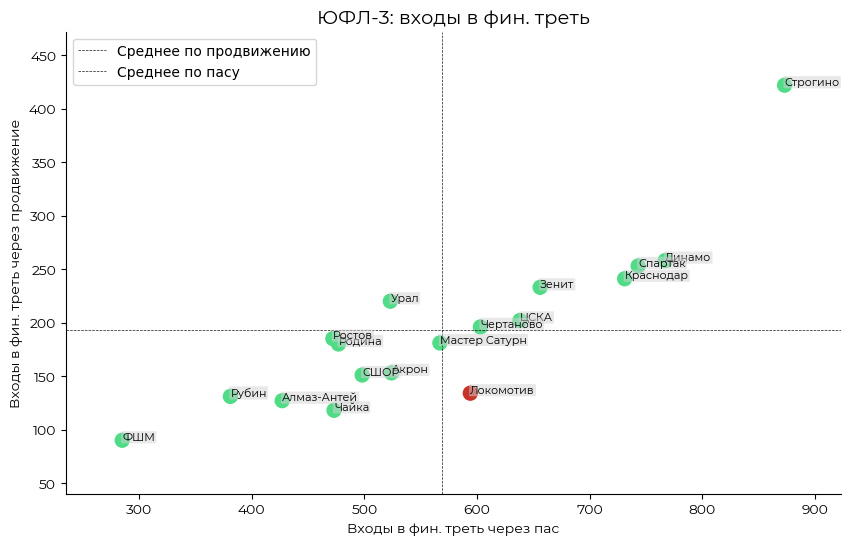

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

prop = fm.FontProperties(fname='/Users/zaytsev/Montserrat-Regular.ttf')

data = {
    "Команда": [
        "Акрон", "Алмаз-Антей", "Динамо", "Зенит",
        "Краснодар", "Локомотив", "Мастер Сатурн", "Родина",
        "Ростов", "Рубин", "СШОР", "Спартак",
        "Строгино", "Урал", "ФШМ", "ЦСКА",
        "Чайка", "Чертаново"
    ],
    "Входы в финальную треть через пас": [
        524, 427, 767, 656, 731, 594, 567, 477, 472, 381,
        498, 743, 873, 523, 285, 638, 473, 603
    ],
    "Входы в финальную треть через продвижение": [
        153, 127, 258, 233, 241, 134, 181, 180, 185, 131,
        151, 253, 422, 220, 90, 202, 118, 196
    ]
}

df = pd.DataFrame(data)

mean_pass = df["Входы в финальную треть через пас"].mean()
mean_progression = df["Входы в финальную треть через продвижение"].mean()

plt.figure(figsize=(10, 6))
plt.scatter(df["Входы в финальную треть через пас"], df["Входы в финальную треть через продвижение"], 
            color=['#C83228' if team == 'Локомотив' else '#50DC87' for team in df["Команда"]],
            s=100)

for i, row in df.iterrows():
    plt.annotate(row["Команда"], 
                 (row["Входы в финальную треть через пас"], row["Входы в финальную треть через продвижение"]),
                 fontproperties=prop, fontsize=8, ha='left',
                 bbox=dict(facecolor='lightgrey', alpha=0.5, edgecolor='none', 
                           boxstyle='round,pad=0.1'))

plt.axhline(mean_progression, color='#181818', linewidth=0.5, ls="--", label='Среднее по продвижению')
plt.axvline(mean_pass, color='#181818', linewidth=0.5, ls="--", label='Среднее по пасу')

plt.xlim(df["Входы в финальную треть через пас"].min() - 50, df["Входы в финальную треть через пас"].max() + 50)
plt.ylim(df["Входы в финальную треть через продвижение"].min() - 50, df["Входы в финальную треть через продвижение"].max() + 50)

plt.xlabel("Входы в фин. треть через пас", fontproperties=prop)
plt.ylabel("Входы в фин. треть через продвижение", fontproperties=prop)

plt.gca().tick_params(axis='x', labelsize=10)
plt.gca().tick_params(axis='y', labelsize=10)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontproperties(prop)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("ЮФЛ-3: входы в фин. треть", fontproperties=prop, size=14)

plt.legend()
plt.savefig("scatter plot.png", bbox_inches="tight")
plt.show()